In [1]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
 
df = pd.ExcelFile('/home/jovyan/work/repos/neuroscience/xnat_dump_file_stats_112817.xlsx')

df.sheet_names

['original',
 'proctype',
 'all job (remove zero input)',
 'less than a day',
 'less than 12 hour',
 'less than 6 hour',
 'less than 3 hour',
 'less than 2 hour',
 'less than 1 hour']

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_orig = df.parse('all job (remove zero input)')  # read a specific sheet to DataFrame

#df = pd.read_excel('xnat_dump_file_stats_112817.xlsx', sheetname='all job (remove zero input)')
 
print("Column headings:")
print(df_orig.columns)


Column headings:
Index(['id', 'proctype', 'jobstartdate', 'project', 'label', 'input(MB)',
       'output', 'walltime(sec)', 'ratio'],
      dtype='object')


In [9]:
df_orig = df_orig[df_orig["walltime(sec)"]>60] 
df_orig["IO"] = df_orig["input(MB)"] + df_orig["output"]
df_orig.head()

,id,proctype,jobstartdate,project,label,input(MB),output,walltime(sec),ratio,IO
0,VUIISXNAT_E29636,ON_segmentation,2013-07-22,CTONS,CTONS-x-052-x-052-x-4-x-ON_segmentation,6.1,1.1,77383,0.000093,7.2
1,VUIISXNAT_E29652,ON_segmentation,2013-07-22,CTONS,CTONS-x-057-x-057-x-2-x-ON_segmentation,6.5,1.1,46631,0.000163,7.6
2,VUIISXNAT_E30150,ON_segmentation,2013-07-22,CTONS,CTONS-x-339-x-339b-x-2-x-ON_segmentation,10.0,1.1,89351,0.000124,11.1
3,VUIISXNAT_E30448,dtiQA_v2,2013-07-23,ZALD_TTS,ZALD_TTS-x-109598-x-109598-x-1101-x-dtiQA_v2,7.2,52.0,56648,0.001045,59.2
4,VUIISXNAT_E30529,dtiQA_v2,2013-07-23,ZALD_TTS,ZALD_TTS-x-Zald_109852-x-109852-x-1101-x-dtiQA_v2,7.6,58.0,57935,0.001132,65.6


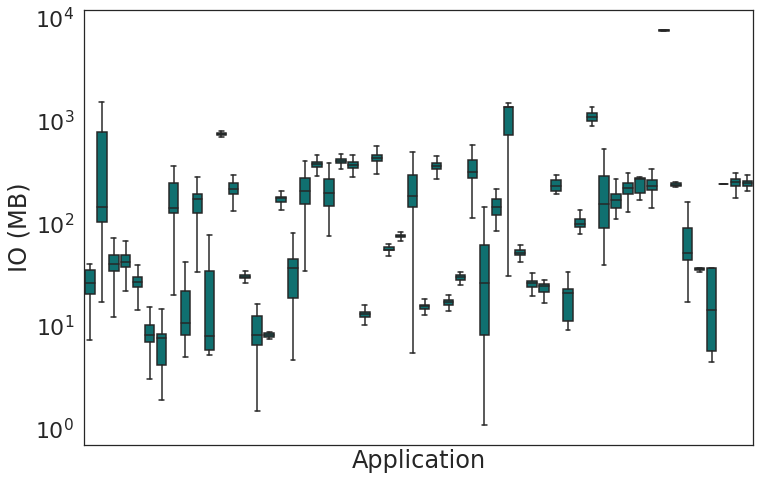

In [18]:
sns.set(font_scale=2)
sns.set_style("white")
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.boxplot(x="proctype", y="IO", data=df_orig,
                 color="teal", showfliers=False)
plt.grid(False)
plt.gca().axes.get_xaxis().set_ticks([])
ax.set_xlabel('Application')
ax.set_ylabel('IO (MB)')
#ax.set_xscale('log', basex=2)
ax.set_yscale('log')

#plt.savefig("figures/time_fail_%s.png" %(dataset), bbox_inches = 'tight')
plt.show()

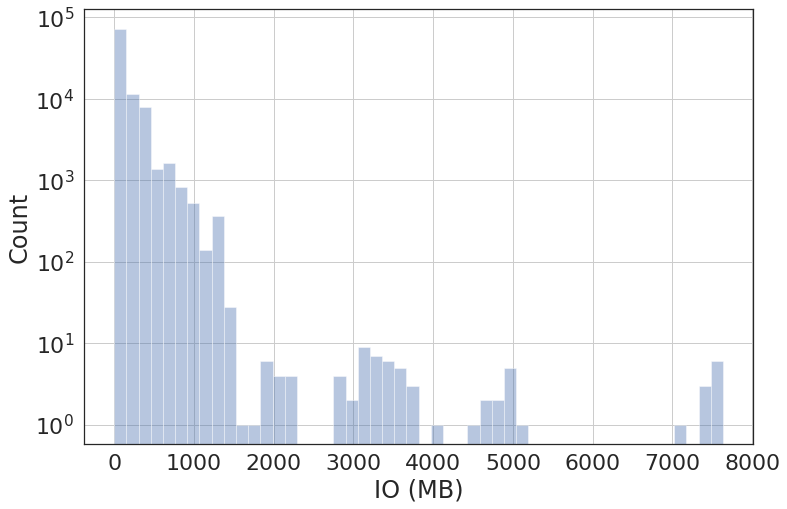

In [23]:
sns.set(font_scale=2)
sns.set_style("white")
fig, ax = plt.subplots(figsize=(12,8))

ax = sns.distplot(df_orig["IO"], kde=False)

plt.grid(True)
ax.set_ylabel('Count')
ax.set_xlabel('IO (MB)')
ax.set_yscale('log')

#plt.savefig("figures/time_fail_%s.png" %(dataset), bbox_inches = 'tight')
plt.show()

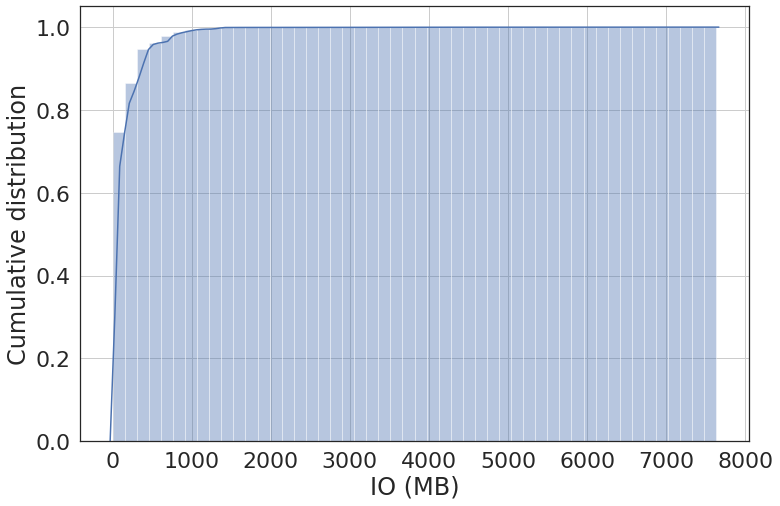

In [27]:
sns.set(font_scale=2)
sns.set_style("white")
fig, ax = plt.subplots(figsize=(12,8))

kwargs = {'cumulative': True}
ax = sns.distplot(df_orig["IO"], hist_kws=kwargs, kde_kws=kwargs)

plt.grid(True)
ax.set_ylabel('Cumulative distribution')
ax.set_xlabel('IO (MB)')
#ax.set_yscale('log')

#plt.savefig("figures/time_fail_%s.png" %(dataset), bbox_inches = 'tight')
plt.show()

In [29]:
df_orig[df_orig.IO>7000]["proctype"].unique()

array(['fMRI_Connectivity_Process_Scan_v3_ma132'], dtype=object)

In [30]:
df_orig[df_orig.proctype=="fMRI_Connectivity_Process_Scan_v3_ma132"].head()

,id,proctype,jobstartdate,project,label,input(MB),output,walltime(sec),ratio,IO
87247,VUIISXNAT02_E42055,fMRI_Connectivity_Process_Scan_v3_ma132,2016-08-12,MORGAN,MORGAN-x-212637-x-212637-x-501-x-fMRI_Connecti...,34.0,7475.2,4330,1.734226,7509.2
87304,VUIISXNAT02_E41940,fMRI_Connectivity_Process_Scan_v3_ma132,2016-08-12,MORGAN,MORGAN-x-208582-x-208582-x-601-x-fMRI_Connecti...,35.0,7372.8,3572,2.073852,7407.8
87334,VUIISXNAT02_E41097,fMRI_Connectivity_Process_Scan_v3_ma132,2016-08-12,MORGAN,MORGAN-x-213157-x-213157-x-501-x-fMRI_Connecti...,45.0,7372.8,4300,1.725070,7417.8
87335,VUIISXNAT02_E41980,fMRI_Connectivity_Process_Scan_v3_ma132,2016-08-12,MORGAN,MORGAN-x-212418-x-212418-x-601-x-fMRI_Connecti...,46.0,7065.6,3407,2.087350,7111.6
87336,VUIISXNAT02_E41118,fMRI_Connectivity_Process_Scan_v3_ma132,2016-08-12,MORGAN,MORGAN-x-226765-x-226765-x-501-x-fMRI_Connecti...,57.0,7475.2,4206,1.790823,7532.2


In [36]:
df = df_orig[df_orig.IO > 1000][["proctype", "input(MB)", "output"]]
df["IO"] = df["input(MB)"]
df["IO_type"] = ["input" for _ in range(len(df))]
df_temp = df_orig[df_orig.IO > 1000][["proctype", "input(MB)", "output"]]
df_temp["IO"] = df_temp["output"]
df_temp["IO_type"] = ["output" for _ in range(len(df))]
df = pd.concat([df, df_temp])
df.head(2)

,proctype,input(MB),output,IO,IO_type
1098,dtiQA_v2,116.0,904.0,116.0,input
1099,dtiQA_v2,124.0,994.0,124.0,input


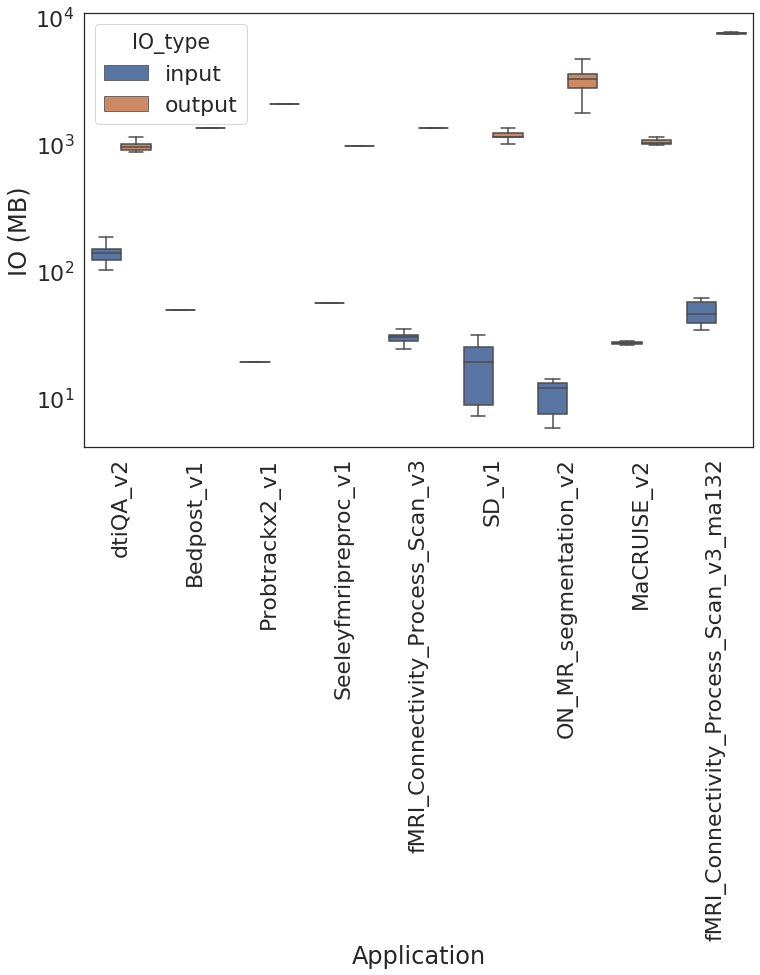

In [40]:
sns.set(font_scale=2)
sns.set_style("white")
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.boxplot(x="proctype", y="IO", hue="IO_type",
                 data=df, showfliers=False)
plt.grid(False)
#plt.gca().axes.get_xaxis().set_ticks([])
ax.set_xlabel('Application')
ax.set_ylabel('IO (MB)')
#ax.set_xscale('log', basex=2)
ax.set_yscale('log')
plt.xticks(rotation=90)

#plt.savefig("figures/time_fail_%s.png" %(dataset), bbox_inches = 'tight')
plt.show()